# Hotel Booking Data Analysis

## 1. Introduction

This notebook presents an Exploratory Data Analysis (EDA) on a hotel booking dataset sourced from Kaggle. The objective is to uncover trends related to bookings, cancellations, customer demographics, pricing patterns, and stay durations.

Through visualizations and insights, this analysis aims to support hotel management, marketing, and revenue teams in understanding guest behavior, improving operational strategies, and enhancing overall customer experience.


## 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Load Data

In [3]:
# Reading the csv file as a dataframe
hb = pd.read_csv('/content/hotel_bookings.csv')

## 4. Data Overview

In [4]:
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hb.shape

(119390, 32)

In [ ]:
# set the number of columns to display
pd.set_option('display.max_columns',32)

In [ ]:
hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hb.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
hb['hotel'].value_counts()
# The dataset is imbalanced because the city hotel and resort hotel doesn't contain equal number of records.

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
hb['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
hb['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
hb['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
hb['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
hb['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [ ]:
hb['total_of_special_requests'].value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [ ]:
hb['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

## 5. Exploratory Data Analysis (EDA)

### 5.1 Booking Distribution by Hotel Type

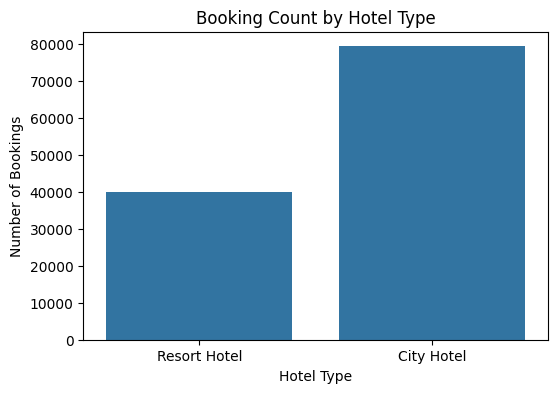

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=hb, x='hotel')
plt.title('Booking Count by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

### 5.2 Top 10 Countries by Number of Bookings

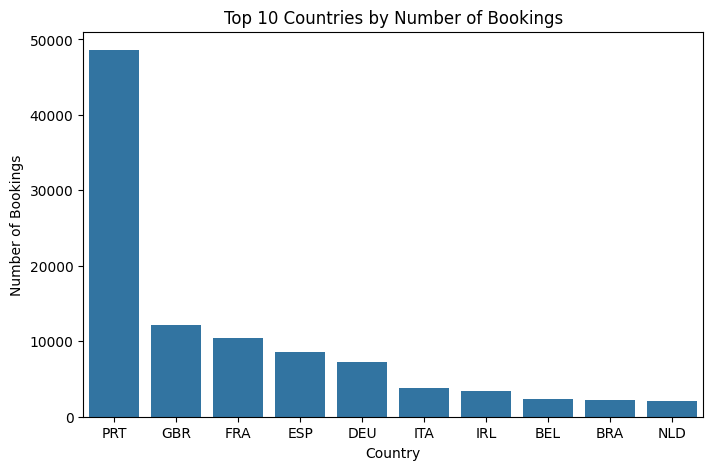

In [9]:
top_countries = hb['country'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Number of Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.show()

### 5.3 Booking & Cancellation Count by Hotel Type

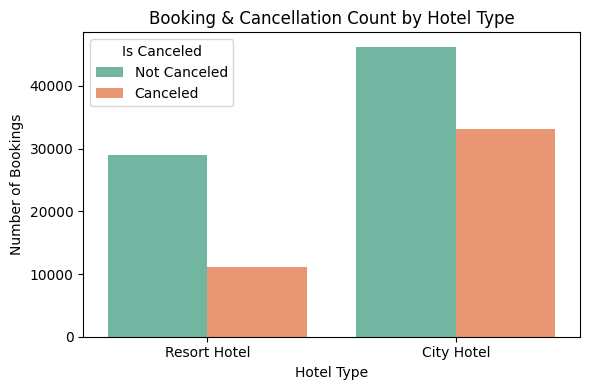

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=hb, x='hotel', hue='is_canceled', palette='Set2')
plt.title('Booking & Cancellation Count by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()

### 5.4 Cancellation Rate by Hotel Type

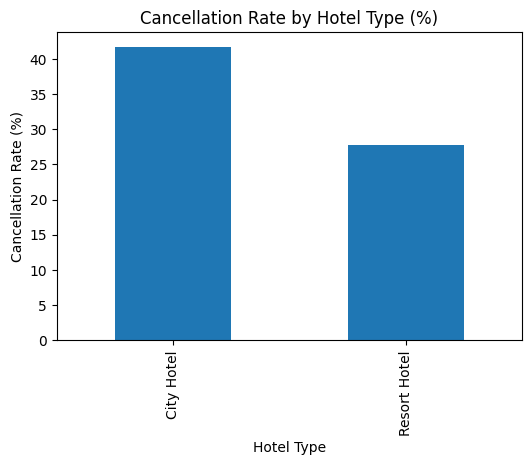

In [10]:
cancel_rate = hb.groupby('hotel')['is_canceled'].mean() * 100
cancel_rate.plot(kind='bar', figsize=(6,4))
plt.title('Cancellation Rate by Hotel Type (%)')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate (%)')
plt.show()

### 5.3 Cancellation Status by Guest Type

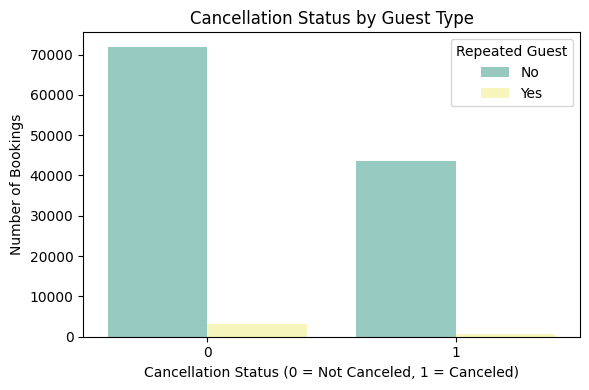

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=hb, x='is_canceled', hue='is_repeated_guest', palette='Set3')
plt.title('Cancellation Status by Guest Type')
plt.xlabel('Cancellation Status (0 = Not Canceled, 1 = Canceled)')
plt.ylabel('Number of Bookings')
plt.legend(title='Repeated Guest', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

## 6. Data Preparation

### 6.1 Handling Missing Data

In [13]:
hb.isnull().values.any()

np.True_

In [14]:
hb.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [15]:
# Replace missing values with 0
hb.fillna(0,inplace=True)

In [16]:
hb.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [17]:
# Replace the meal values "Undefined" to "SC" because undefined and sc means no breakfast
hb.replace("Undefined","SC",inplace=True)

In [18]:
hb['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [21]:
Subset = hb[(hb['children']==0) & (hb['adults']==0) & (hb['babies']==0)]
# a a filtered DataFrame with asubset of the hotel booking dataset where no guests (children, adults, or babies) are
# present in the booking

In [22]:
Subset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [23]:
Subset[['adults','babies','children']]

,adults,babies,children
2224,0,0,0.0
2409,0,0,0.0
3181,0,0,0.0
3684,0,0,0.0
3708,0,0,0.0
...,...,...,...
115029,0,0,0.0
115091,0,0,0.0
116251,0,0,0.0
116534,0,0,0.0


In [24]:
type(Subset)

pandas.core.frame.DataFrame

In [25]:
Delete=(hb['children']==0) & (hb['adults']==0) & (hb['babies']==0)
# a boolean mask where each element is True if the row has children=0, adults=0, babies=0; otherwise False

In [26]:
Delete

,0
0,False
1,False
2,False
3,False
4,False
...,...
119385,False
119386,False
119387,False
119388,False


In [27]:
type(Delete)

pandas.core.series.Series

### 6.2 Create a Clean Dataset by Removing Inappropriate Data

In [28]:
data = hb[~Delete]
# creates a new dataframe by filtering out rows where children, adults, and babies are all zero

In [29]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [30]:
Subset1 = data[(data['children']==0) & (data['adults']==0) & (data['babies']==0)]
# checking from the DataFrame data, for any row where children, adults, and babies are all zero

In [31]:
Subset1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [32]:
data.shape

(119210, 32)

In [33]:
data.to_csv('Updated_Hotel_Booking.csv', index=False)

# saves the DataFrame data to a CSV file named Updated_Hotel_Booking.csv without writing the row indices.
# So the filtered data (with rows where children, adults, and babies are not all zero) will be saved in that CSV file.

### 6.3 Guest Origin by Country

In [34]:
guest_country = data[data['is_canceled']==0]['country'].value_counts().reset_index()
guest_country.columns = ['country','number of guests']

# This code counts and lists the number of guests from each country who did not cancel their bookings, storing the result
# in a DataFrame with clear column names like country and number of guests.

In [35]:
guest_country

,country,number of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,KIR,1
162,ATF,1
163,TJK,1
164,SLE,1


## 7. Data Visualization

### 7.1 Install and import the libraries

In [36]:
!pip install plotly

In [37]:
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

### 7.2 Percentage Share of Guests by Country

In [39]:
total_guests = guest_country['number of guests'].sum()
guest_country['Guests in %'] = round(guest_country['number of guests'] / total_guests * 100, 2)

# Calculate total non-canceled guests and compute each country's percentage share of these guests

In [40]:
guest_country

,country,number of guests,Guests in %
0,PRT,20977,27.97
1,GBR,9668,12.89
2,FRA,8468,11.29
3,ESP,6383,8.51
4,DEU,6067,8.09
...,...,...,...
161,KIR,1,0.00
162,ATF,1,0.00
163,TJK,1,0.00
164,SLE,1,0.00


### 7.3 Visualizing Guest Count by Country

In [42]:
#  Create a bar chart to visualize the number of guests from each country
trace = go.Bar(
    x = guest_country['country'],
    y = guest_country['number of guests'],
    marker = dict(color='#CD7F32')
)
data1 = [ trace]
layout = go.Layout(
    title = 'Guests by Country'
)
fig = go.Figure(data=data1, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [43]:
import plotly.graph_objects as go

# Sample guest_country DataFrame (replace this with your actual DataFrame)
# guest_country = pd.DataFrame({
#     'country': ['PRT', 'GBR', 'FRA'],
#     'Number of guests': [500, 450, 400]
# })

trace = go.Bar(
    x=guest_country['country'],
    y=guest_country['number of guests'],
    marker=dict(color='#CD7F32')
)

layout = go.Layout(
    title='Guests by Country',
    xaxis_title='Country',
    yaxis_title='Number of Guests'
)

fig = go.Figure(data=[trace], layout=layout)

# Display the figure directly
fig.show()

### 7.4 Visualize Home Country of Guests

In [44]:
# Create a choropleth map showing the number of guests from each country with hover info and a title
map_guest = px.choropleth(guest_country,
                          locations=guest_country['country'],
                          color=guest_country['number of guests'],
                          hover_name=guest_country['country'],
                          title='Home country of guests'
                          )
map_guest.show()

People from all over the world are staying in these two hotels.

Most guests are from Portugal and other countries in Europe.

50% of the guests are from Portugal, Great Britain and France.

### 7.5 Percentage of Guests by Country

In [45]:
# Create a bar chart visualizing the percentage share of guests from each country
trace1 = go.Bar(
    x = guest_country['country'],
    y = guest_country['Guests in %'],
    marker = dict(color='#CD7F32')
)
data2 = [ trace1]
layout1 = go.Layout(
    title = 'Percentage of Guests by Country'
)
fig1 = go.Figure(data=data2, layout=layout1)
pyo.plot(fig1)

'temp-plot.html'

In [46]:
import plotly.graph_objects as go

trace1 = go.Bar(
    x=guest_country['country'],
    y=guest_country['Guests in %'],
    marker=dict(color='#CD7F32')
)

layout1 = go.Layout(
    title='Percentage of Guests by Country',
    xaxis_title='Country',
    yaxis_title='Percentage (%)'
)

fig1 = go.Figure(data=[trace1], layout=layout1)

fig1.show()  # This displays the chart inline

### 7.6 Guest Distribution by Country Percentage

In [47]:
# Map
map_guest1 = px.choropleth(guest_country,
                          locations=guest_country['country'],
                          color=guest_country['Guests in %'],
                          hover_name=guest_country['country'],
                          title='Home country of guests'
                          )
map_guest1.show()

### 7.6 Variation in Price per Night Throughout the Year

#### 7.6.1 Mis-interpreting the data

In [48]:
resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

In [49]:
resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,No Deposit,143.0,0.0,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,No Deposit,250.0,0.0,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,No Deposit,250.0,0.0,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,No Deposit,40.0,0.0,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [50]:
city

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-03
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
40071,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,2015-07-05
40072,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [51]:
resort_hotel = resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel
# adr - average daily rate

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [52]:
city_hotel = city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [53]:
final = resort_hotel.merge(city_hotel, on='arrival_date_month')
final

,arrival_date_month,adr_x,adr_y
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [54]:
final.columns = ['month', 'price_for_resort', 'price_for_city']
final

,month,price_for_resort,price_for_city
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [55]:
!pip install sort-dataframeby-monthorweek

  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3419 sha256=0bb8af359f35e89bc04b0f25bf3cee0dca7012fc4e898b016f68ef9e4dc91201
  Stored in directory: /root/.cache/pip/wheels/ac/4c/ca/134c7282a08e7e2b149b1da1975c6686a262c15a92b78adcc7
Successfully built sort-dataframeby-monthorweek


In [56]:
!pip install sorted-months-weekdays

  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3225 sha256=6801fb386528991507da92df66bb4e37e298c6bc41e989f477751957cf237914
  Stored in directory: /root/.cache/pip/wheels/4d/4f/f5/d9e3e3e60d80b3cdc2f69dfcf0d4bc45257abdea94f2035dbb
Successfully built sorted-months-weekdays


In [57]:
import sort_dataframeby_monthorweek as sd
final = sd.Sort_Dataframeby_Month(df=final,monthcolumnname='month')
final

,month,price_for_resort,price_for_city
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [58]:
px.line(final, x='month',
        y=['price_for_resort','price_for_city'],
        title='Room price per night over the months')

#### 7.6.2 Correct Interpretation

In [59]:
data['adr_Updated'] = data['adr']/(data['adults']+data['children'])

/tmp/ipython-input-59-1206029351.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

In [61]:
resort_hotel = resort.groupby(['arrival_date_month'])['adr_Updated'].mean().reset_index()
resort_hotel

,arrival_date_month,adr_Updated
0,April,43.726059
1,August,83.322653
2,December,37.666300
3,February,30.845022
4,January,31.169218
5,July,70.262366
6,June,56.346298
7,March,34.100690
8,May,42.254335
9,November,30.002893


In [62]:
city_hotel = city.groupby(['arrival_date_month'])['adr_Updated'].mean().reset_index()
city_hotel

,arrival_date_month,adr_Updated
0,April,58.715028
1,August,57.771630
2,December,47.724939
3,February,50.950846
4,January,51.280071
5,July,57.258853
6,June,66.335898
7,March,52.477652
8,May,69.987850
9,November,57.142431


In [63]:
final = resort_hotel.merge(city_hotel, on='arrival_date_month')
final

,arrival_date_month,adr_Updated_x,adr_Updated_y
0,April,43.726059,58.715028
1,August,83.322653,57.771630
2,December,37.666300,47.724939
3,February,30.845022,50.950846
4,January,31.169218,51.280071
5,July,70.262366,57.258853
6,June,56.346298,66.335898
7,March,34.100690,52.477652
8,May,42.254335,69.987850
9,November,30.002893,57.142431


In [64]:
final.columns = ['month', 'price_for_resort', 'price_for_city']
final

,month,price_for_resort,price_for_city
0,April,43.726059,58.715028
1,August,83.322653,57.771630
2,December,37.666300,47.724939
3,February,30.845022,50.950846
4,January,31.169218,51.280071
5,July,70.262366,57.258853
6,June,56.346298,66.335898
7,March,34.100690,52.477652
8,May,42.254335,69.987850
9,November,30.002893,57.142431


In [65]:
import sort_dataframeby_monthorweek as sd
final = sd.Sort_Dataframeby_Month(df=final,monthcolumnname='month')
final

,month,price_for_resort,price_for_city
0,January,31.169218,51.280071
1,February,30.845022,50.950846
2,March,34.100690,52.477652
3,April,43.726059,58.715028
4,May,42.254335,69.987850
5,June,56.346298,66.335898
6,July,70.262366,57.258853
7,August,83.322653,57.771630
8,September,50.372746,67.042091
9,October,35.144775,61.800547


In [66]:
px.line(final, x='month',
        y=['price_for_resort','price_for_city'],
        title='Room price per night over the months')

### 7.7 Average Nightly Room Price Paid by Guests

In [67]:
hb['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [68]:
data['adr_Updated']=data['adr']/(data['adults']+data['children'])
data

/tmp/ipython-input-68-692050602.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Updated
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000


/tmp/ipython-input-69-3415078251.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



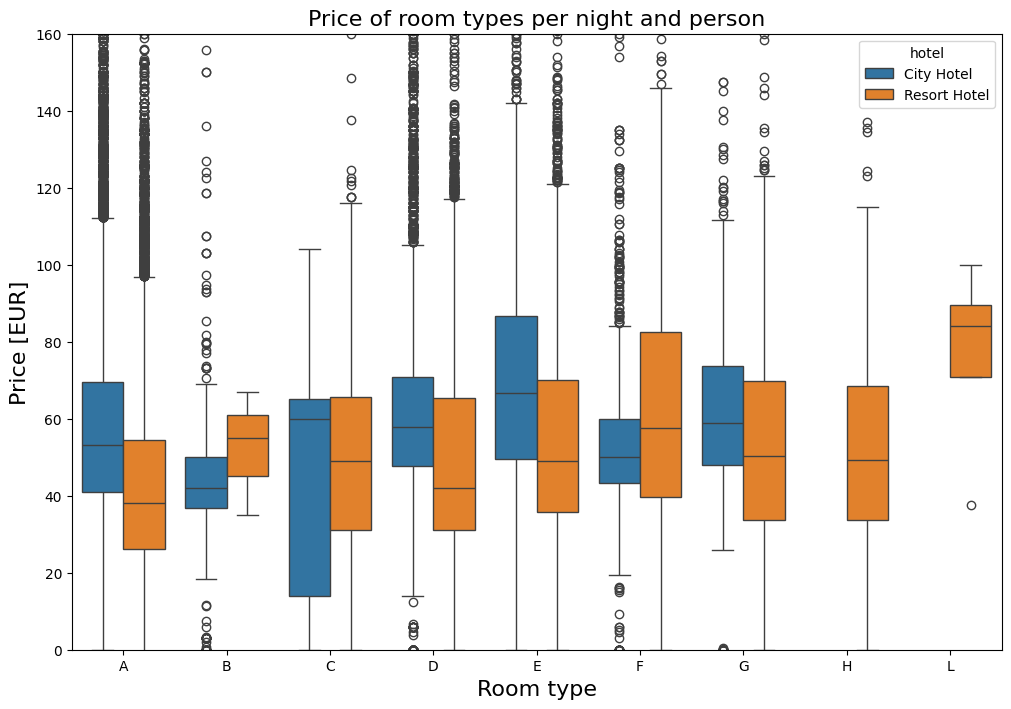

In [69]:
data['adr_Updated']=data['adr']/(data['adults']+data['children'])
valid_guest = data.loc[data['is_canceled']==0]
prices = valid_guest[['hotel','reserved_room_type','adr_Updated']].sort_values('reserved_room_type')

plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',
            y='adr_Updated',
            hue='hotel',
            data=prices
            )
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)

plt.ylim(0, 160) # it adjusts the size of the y-axis of bar chart
plt.show()

In [70]:
prices = valid_guest[['hotel', 'reserved_room_type', 'adr_Updated']].sort_values('reserved_room_type')
prices

,hotel,reserved_room_type,adr_Updated
119389,City Hotel,A,75.60
102432,City Hotel,A,89.55
77019,City Hotel,A,53.00
77020,City Hotel,A,53.00
77021,City Hotel,A,50.40
...,...,...,...
24110,Resort Hotel,H,34.00
354,Resort Hotel,L,37.50
15855,Resort Hotel,L,86.00
911,Resort Hotel,L,100.00


In [71]:
prices_C=prices[prices['reserved_room_type']=='C']
prices_C

,hotel,reserved_room_type,adr_Updated
119278,City Hotel,C,104.000000
99432,City Hotel,C,65.000000
99431,City Hotel,C,65.000000
101137,City Hotel,C,55.000000
0,Resort Hotel,C,0.000000
...,...,...,...
27668,Resort Hotel,C,88.500000
39525,Resort Hotel,C,87.500000
15642,Resort Hotel,C,62.500000
15609,Resort Hotel,C,40.500000


In [72]:
prices_City=prices_C[prices_C['hotel']=='City Hotel']
prices_Resort=prices_C[prices_C['hotel']=='Resort Hotel']

In [73]:
prices_City

,hotel,reserved_room_type,adr_Updated
119278,City Hotel,C,104.0
99432,City Hotel,C,65.0
99431,City Hotel,C,65.0
101137,City Hotel,C,55.0
82509,City Hotel,C,0.0
82508,City Hotel,C,0.0
44693,City Hotel,C,65.0
80557,City Hotel,C,18.5


In [74]:
prices_Resort

,hotel,reserved_room_type,adr_Updated
0,Resort Hotel,C,0.000000
34951,Resort Hotel,C,30.250000
15955,Resort Hotel,C,47.366667
25990,Resort Hotel,C,62.166667
15960,Resort Hotel,C,90.000000
...,...,...,...
27668,Resort Hotel,C,88.500000
39525,Resort Hotel,C,87.500000
15642,Resort Hotel,C,62.500000
15609,Resort Hotel,C,40.500000


In [75]:
prices_City.describe()

,adr_Updated
count,8.00000
mean,46.56250
std,36.86601
min,0.00000
25%,13.87500
50%,60.00000
75%,65.00000
max,104.00000


In [76]:
prices_Resort.describe()

,adr_Updated
count,615.000000
mean,50.549085
std,27.821397
min,0.000000
25%,31.000000
50%,49.000000
75%,65.562500
max,171.000000


### 7.8 Average Duration of Stay at the Hotels

In [77]:
df3 = data[data['is_canceled']==0]
df3['total_nights'] = df3['stays_in_weekend_nights'] + df3['stays_in_week_nights']

/tmp/ipython-input-77-150057996.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
df3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Updated,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000,7


In [79]:
df4 = df3[['total_nights','hotel','is_canceled']]

In [80]:
df4

,total_nights,hotel,is_canceled
0,0,Resort Hotel,0
1,0,Resort Hotel,0
2,1,Resort Hotel,0
3,1,Resort Hotel,0
4,2,Resort Hotel,0
...,...,...,...
119385,7,City Hotel,0
119386,7,City Hotel,0
119387,7,City Hotel,0
119388,7,City Hotel,0


In [81]:
hotel_stay = df4.groupby(['total_nights','hotel']).agg('count').reset_index()
hotel_stay

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [82]:
hotel_stay = hotel_stay.rename(columns={'is_canceled':'Number of stays'})
hotel_stay.head()

,total_nights,hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


In [83]:
hotel_stay_r=hotel_stay[hotel_stay['hotel']=='Resort Hotel']
hotel_stay_r

,total_nights,hotel,Number of stays
1,0,Resort Hotel,371
3,1,Resort Hotel,6579
5,2,Resort Hotel,4488
7,3,Resort Hotel,3828
9,4,Resort Hotel,3321
11,5,Resort Hotel,1899
13,6,Resort Hotel,1205
15,7,Resort Hotel,4434
17,8,Resort Hotel,509
19,9,Resort Hotel,408


In [84]:
hotel_stay_c=hotel_stay[hotel_stay['hotel']=='City Hotel']
hotel_stay_c

,total_nights,hotel,Number of stays
0,0,City Hotel,251
2,1,City Hotel,9155
4,2,City Hotel,10983
6,3,City Hotel,11889
8,4,City Hotel,7694
10,5,City Hotel,3210
12,6,City Hotel,1111
14,7,City Hotel,1245
16,8,City Hotel,205
18,9,City Hotel,119


In [85]:
trace = go.Bar(
    x=hotel_stay_r['total_nights'],
    y=hotel_stay_r['Number of stays'],
    name='Resort Stay'
)

trace1 = go.Bar(
    x=hotel_stay_c['total_nights'],
    y=hotel_stay_c['Number of stays'],
    name='City Stay'
)

data5 = [trace,trace1]
layout = go.Layout(
    title='Total Number of stays by Guest'
)
fig=go.Figure(data=data5, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [86]:
import plotly.graph_objects as go

# Bar trace for Resort Stay
trace = go.Bar(
    x=hotel_stay_r['total_nights'],
    y=hotel_stay_r['Number of stays'],
    name='Resort Stay'
)

# Bar trace for City Stay
trace1 = go.Bar(
    x=hotel_stay_c['total_nights'],
    y=hotel_stay_c['Number of stays'],
    name='City Stay'
)

data5 = [trace, trace1]

# Layout with title and axis labels
layout = go.Layout(
    title='Total Number of Stays by Guest',
    xaxis_title='Total Nights Stayed',
    yaxis_title='Number of Stays',
    barmode='group'  # show bars side by side
)

fig = go.Figure(data=data5, layout=layout)

# Display the chart on screen
fig.show()

### 7.9 Bookings by Market Segment

In [87]:
segments = data['market_segment'].value_counts()
segments

,count
market_segment,
Online TA,56408
Offline TA/TO,24182
Groups,19791
Direct,12582
Corporate,5282
Complementary,728
Aviation,235
SC,2


In [88]:
# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title='Bookings per market segment',
             template='seaborn'
             )
fig.update_traces(rotation=-90, textinfo='percent+label')
fig.show()

/tmp/ipython-input-89-3601052983.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




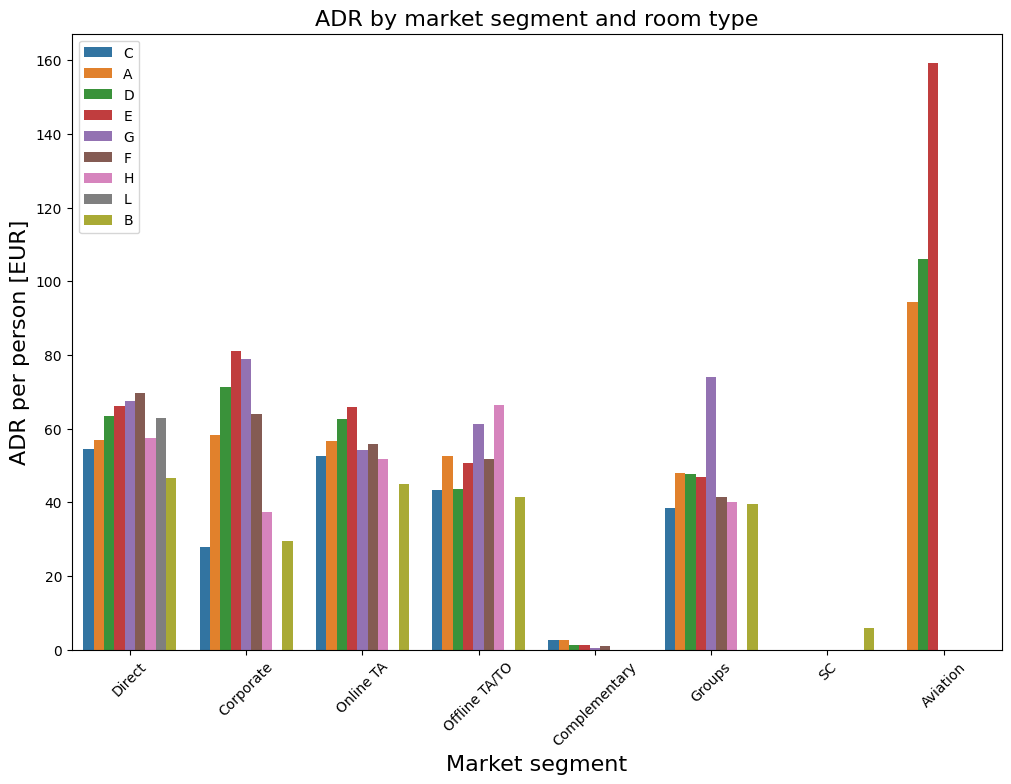

In [89]:
# bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='market_segment',
            y='adr_Updated',
            hue='reserved_room_type',
            data=data,
            ci=None
            )
plt.title('ADR by market segment and room type', fontsize=16)
plt.xlabel('Market segment', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('ADR per person [EUR]', fontsize=16)
plt.legend(loc='upper left')
plt.show()

### 7.10 Total Number of Canceled Bookings

In [90]:
# Cancel=data['is_canceled'].sum()
Cancel=data['is_canceled']==1

In [91]:
cancel = Cancel.sum()

In [92]:
resort_cancelation = data.loc[data['hotel'] == 'Resort Hotel']['is_canceled'].sum()
city_cancelation = data.loc[data['hotel'] == 'City Hotel']['is_canceled'].sum()

In [93]:
resort_cancelation

np.int64(11120)

In [94]:
city_cancelation

np.int64(33079)

In [95]:
print(f'Total Booking Canceled : {cancel} .')
print(f'Total Resort Hotel Booking Canceled : {resort_cancelation} .')
print(f'Total City Hotel Booking Canceled : {city_cancelation} .')

Total Booking Canceled : 44199 .
Total Resort Hotel Booking Canceled : 11120 .
Total City Hotel Booking Canceled : 33079 .


### 7.11 Monthly Distribution of Booking Cancellations

In [96]:
res_book_per_month = data.loc[(data['hotel'] == 'Resort Hotel')].groupby('arrival_date_month')['hotel'].count()
res_cancel_per_month = data.loc[(data['hotel'] == 'Resort Hotel')].groupby('arrival_date_month')['is_canceled'].sum()

city_book_per_month = data.loc[(data['hotel'] == 'City Hotel')].groupby('arrival_date_month')['hotel'].count()
city_cancel_per_month = data.loc[(data['hotel'] == 'City Hotel')].groupby('arrival_date_month')['is_canceled'].sum()

res_cancel_data = pd.DataFrame({'Hotel': 'Resort Hotel',
                                'Month': list(res_book_per_month.index),
                                'Bookings': list(res_book_per_month.values),
                                'Cancelations': list(res_cancel_per_month.values)
                                })

city_cancel_data = pd.DataFrame({'Hotel': 'City Hotel',
                                'Month': list(city_book_per_month.index),
                                'Bookings': list(city_book_per_month.values),
                                'Cancelations': list(city_cancel_per_month.values)
                                })

full_cancel_data = pd.concat([res_cancel_data, city_cancel_data], ignore_index=True)

In [97]:
res_book_per_month

,hotel
arrival_date_month,
April,3609
August,4894
December,2645
February,3102
January,2191
July,4573
June,3044
March,3334
May,3559


In [98]:
res_cancel_per_month

,is_canceled
arrival_date_month,
April,1059
August,1637
December,631
February,794
January,325
July,1436
June,1007
March,763
May,1024


In [99]:
city_book_per_month

,hotel
arrival_date_month,
April,7469
August,8967
December,4114
February,4950
January,3730
July,8071
June,7885
March,6434
May,8221


In [100]:
city_cancel_per_month

,is_canceled
arrival_date_month,
April,3459
August,3600
December,1737
February,1899
January,1481
July,3301
June,3527
March,2385
May,3653


In [101]:
res_cancel_data

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,April,3609,1059
1,Resort Hotel,August,4894,1637
2,Resort Hotel,December,2645,631
3,Resort Hotel,February,3102,794
4,Resort Hotel,January,2191,325
5,Resort Hotel,July,4573,1436
6,Resort Hotel,June,3044,1007
7,Resort Hotel,March,3334,763
8,Resort Hotel,May,3559,1024
9,Resort Hotel,November,2435,460


In [102]:
city_cancel_data

,Hotel,Month,Bookings,Cancelations
0,City Hotel,April,7469,3459
1,City Hotel,August,8967,3600
2,City Hotel,December,4114,1737
3,City Hotel,February,4950,1899
4,City Hotel,January,3730,1481
5,City Hotel,July,8071,3301
6,City Hotel,June,7885,3527
7,City Hotel,March,6434,2385
8,City Hotel,May,8221,3653
9,City Hotel,November,4336,1660


In [103]:
full_cancel_data

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,April,3609,1059
1,Resort Hotel,August,4894,1637
2,Resort Hotel,December,2645,631
3,Resort Hotel,February,3102,794
4,Resort Hotel,January,2191,325
5,Resort Hotel,July,4573,1436
6,Resort Hotel,June,3044,1007
7,Resort Hotel,March,3334,763
8,Resort Hotel,May,3559,1024
9,Resort Hotel,November,2435,460


In [104]:
import sort_dataframeby_monthorweek as sd
res_cancel_data = sd.Sort_Dataframeby_Month(df=res_cancel_data, monthcolumnname='Month')
res_cancel_data

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,January,2191,325
1,Resort Hotel,February,3102,794
2,Resort Hotel,March,3334,763
3,Resort Hotel,April,3609,1059
4,Resort Hotel,May,3559,1024
5,Resort Hotel,June,3044,1007
6,Resort Hotel,July,4573,1436
7,Resort Hotel,August,4894,1637
8,Resort Hotel,September,3108,1006
9,Resort Hotel,October,3553,978


In [105]:
import sort_dataframeby_monthorweek as sd
city_cancel_data = sd.Sort_Dataframeby_Month(df=city_cancel_data, monthcolumnname='Month')
city_cancel_data

,Hotel,Month,Bookings,Cancelations
0,City Hotel,January,3730,1481
1,City Hotel,February,4950,1899
2,City Hotel,March,6434,2385
3,City Hotel,April,7469,3459
4,City Hotel,May,8221,3653
5,City Hotel,June,7885,3527
6,City Hotel,July,8071,3301
7,City Hotel,August,8967,3600
8,City Hotel,September,7392,3109
9,City Hotel,October,7594,3268


In [106]:
import sort_dataframeby_monthorweek as sd
full_cancel_data = sd.Sort_Dataframeby_Month(df=full_cancel_data, monthcolumnname='Month')
full_cancel_data

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,January,2191,325
1,City Hotel,January,3730,1481
2,Resort Hotel,February,3102,794
3,City Hotel,February,4950,1899
4,Resort Hotel,March,3334,763
5,City Hotel,March,6434,2385
6,Resort Hotel,April,3609,1059
7,City Hotel,April,7469,3459
8,Resort Hotel,May,3559,1024
9,City Hotel,May,8221,3653


In [107]:
# plt.figure(figsize=(12,8))

trace = go.Bar(
    x=res_cancel_data['Month'],
    y=res_cancel_data['Cancelations'],
    name='Rst Cancelled'
)

trace1 = go.Bar(
    x=city_cancel_data['Month'],
    y=city_cancel_data['Cancelations'],
    name='Cty Cancelled'
)

data6 = [trace, trace1]
layout = go.Layout(
    title='Total Number of stays by Guest'
)
fig = go.Figure(data=data6, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [108]:
import plotly.graph_objects as go

# Bar trace for Resort cancellations
trace = go.Bar(
    x=res_cancel_data['Month'],
    y=res_cancel_data['Cancelations'],
    name='Resort Cancelled'
)

# Bar trace for City cancellations
trace1 = go.Bar(
    x=city_cancel_data['Month'],
    y=city_cancel_data['Cancelations'],
    name='City Cancelled'
)

data6 = [trace, trace1]

# Layout with title and axis labels
layout = go.Layout(
    title='Monthly Booking Cancellations by Hotel Type',
    xaxis_title='Month',
    yaxis_title='Number of Cancellations',
    barmode='group'  # shows bars side-by-side
)

fig = go.Figure(data=data6, layout=layout)

# Display the chart on screen
fig.show()